# simulating galton

After class, there was discussion about under what conditions Galton's ideas really would lead to an increase in "height" of the distribution. Let's simulate what Galton was driving at, and simulate what a selection might look modeled simply as biasing regression

as always, start by importing things: numpy for the math, matplotlib for plotting

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

We'll need to define the total population size *N* as well as the initial mean height, $\mu_1$

In [2]:
N=400;mu1=50;

Using these, generate a random distribution from the normal distribution=Gaussian=bell curve. Next, plot as a histogram

In [3]:
h=numpy.random.normal(mu1,1,N)

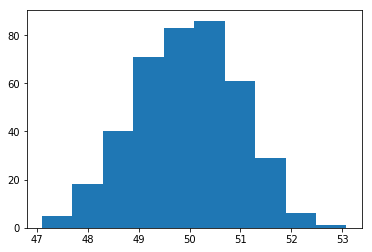

In [4]:
plt.hist(h);plt.show()

# regression

Now let's implement regression (in the Galton sense, not in the sense of fitting to a line). For this we need specify only what the regression coefficient *r* is (which sets how quickly one reaches the mean) as well as the eventual mean $\mu$.

In [5]:
r=.9;mu=8

Now let's simulate a T generations wher the expected height of a child whose parent is height $h$ is $\mu+r(h-\mu)$

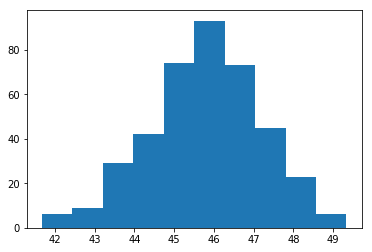

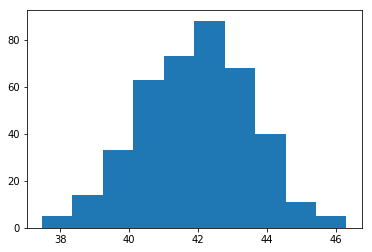

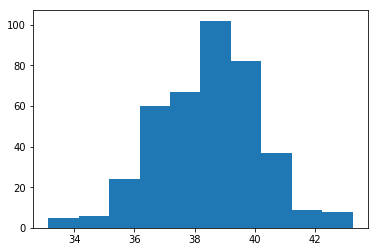

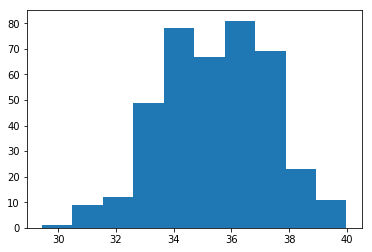

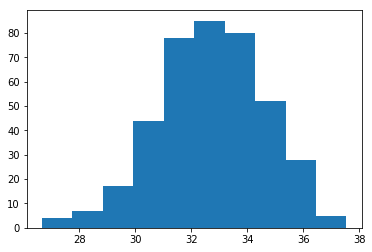

In [6]:
T=6
for counter in range(1, T):
    mus=r*(h-mu)+mu;h=numpy.random.normal(loc=mus,scale=1);plt.hist(h);plt.show();numpy.mean(h)

The distribution is approaching $\mu$ from $\mu_1$, slowly. Let's run this for many iterations, and record the mean at each iteration

In [7]:
means=[]

In [8]:
T=60
for counter in range(1, T):
    mus=r*(h-mu)+mu
    h=numpy.random.normal(loc=mus,scale=1)
    means=numpy.append(arr=means,values=numpy.mean(h))

Let's plot this mean over generations:

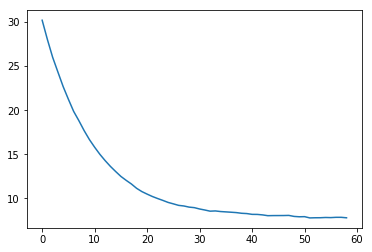

In [9]:
plt.plot(means);plt.show()

And the last $m$ values:

In [10]:
m=3;
means[-m:]

array([ 7.85794824,  7.85744713,  7.80468495])

From this we've learned that, even though we started with titans of height $\mu_1$, they regressed to the mean of $\mu$

# galton's plot

Let's see if we can generate Galton's plot of a 2d elipse of equi-probability. We can do that easily using a "2d histogram" of child height vs parent height

In [11]:
mus=r*(h-mu)+mu
hnew=numpy.random.normal(loc=mus,scale=1)

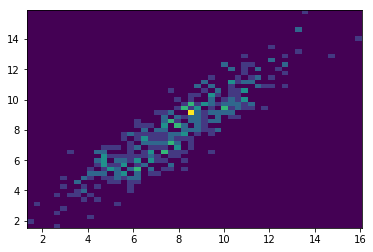

In [12]:
plt.hist2d(y=hnew,x=h,bins=50);plt.show()

# selective pressure
How might selection influence mean height? We can simulate without changing the "regression", i.e., we keep the same expression for the expected child height, but change which members of the population are chosen to be included in the sample at next generation

for example, let's imagine that only examples with height above $h_{min}$ are included:

In [13]:
means=[]
hmin=3;T=100
for counter in range(1, T):
    h=h[h>hmin]
    while len(h)<N:
        h=numpy.append(arr=h,values=numpy.max(h))
    mus=r*(h-mu)+mu
    h=numpy.random.normal(loc=mus,scale=1)
    means=numpy.append(arr=means,values=numpy.mean(h))

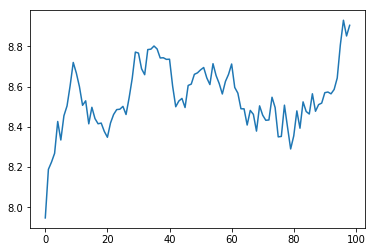

In [14]:
plt.plot(means);plt.show()

In [15]:
means[-m:]

array([ 8.92924951,  8.8511763 ,  8.90407549])

hmmmm... not that different, but still different. Let's try a new $h_{min}$:

In [16]:
hmin=5;
for counter in range(1, T):
    h=h[h>hmin]
    while len(h)<N:
        h=numpy.append(arr=h,values=numpy.max(h))
    mus=r*(h-mu)+mu
    h=numpy.random.normal(loc=mus,scale=1)
    means=numpy.append(arr=means,values=numpy.mean(h))

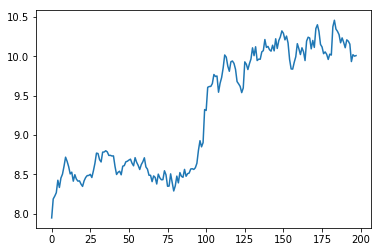

array([ 10.02222177,  10.00358531,  10.0106066 ])

In [17]:
plt.plot(means);plt.show();means[-3:]

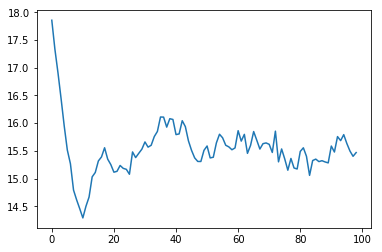

array([ 15.49678782,  15.40113916,  15.46847823])

In [18]:
means=[];hmin=10;
for counter in range(1, T):
    h=h[h>hmin]
    while len(h)<N:
        h=numpy.append(arr=h,values=numpy.max(h))
    mus=r*(h-mu)+mu
    h=numpy.random.normal(loc=mus,scale=1)
    means=numpy.append(arr=means,values=numpy.mean(h))
plt.plot(means);plt.show();means[-3:]

Hmm. what about negative hmin, so that all is allowed?

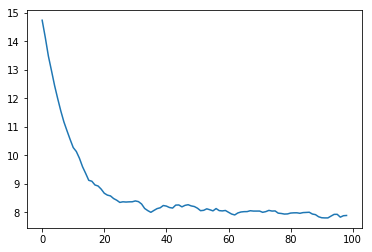

array([ 7.83236157,  7.88270847,  7.89120257])

In [19]:
means=[]
for counter in range(1, 100):
    h=h[h>-4]
    while len(h)<N:
        h=numpy.append(arr=h,values=numpy.max(h))
    mus=r*(h-mu)+mu
    h=numpy.random.normal(loc=mus,scale=1)
    means=numpy.append(arr=means,values=numpy.mean(h))
plt.plot(means);plt.show();means[-3:]

## median selection

A slightly different rule: we eliminate the bottom half, replacing with the max

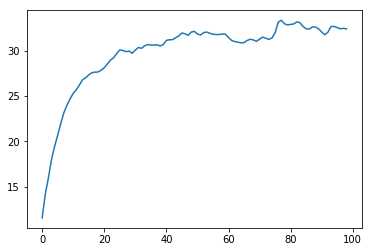

array([ 32.41587961,  32.45975028,  32.40555823])

In [20]:
means=[]
for counter in range(1, T):
    h=h[h>numpy.median(h)]
    while len(h)<N:
        h=numpy.append(arr=h,values=numpy.max(h))
    mus=r*(h-mu)+mu
    h=numpy.random.normal(loc=mus,scale=1)
    means=numpy.append(arr=means,values=numpy.mean(h))
plt.plot(means);plt.show();means[-3:]

What about replacing with the top half?

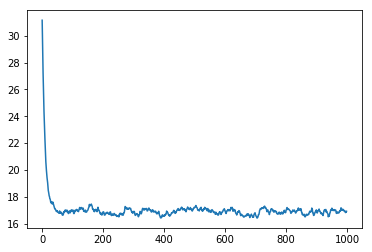

array([ 16.87376366,  16.84995977,  16.91312395])

In [21]:
means=[]
for counter in range(1, 1000):
    h=h[h>numpy.median(h)]
    while len(h)<N:
        h=numpy.append(arr=h,values=h)
    mus=r*(h-mu)+mu
    h=numpy.random.normal(loc=mus,scale=1)
    means=numpy.append(arr=means,values=numpy.mean(h))
plt.plot(means);plt.show();means[-3:]

What about eliminating just the sole minimum?

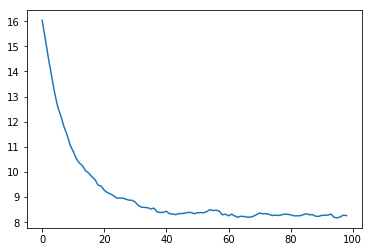

array([ 8.2152738 ,  8.28140729,  8.26266847])

In [22]:
means=[]
for counter in range(1, T):
    h=h[h>numpy.min(h)]
    while len(h)<N:
        h=numpy.append(arr=h,values=numpy.max(h))
    mus=r*(h-mu)+mu
    h=numpy.random.normal(loc=mus,scale=1)
    means=numpy.append(arr=means,values=numpy.mean(h))
plt.plot(means);plt.show();means[-3:]

# return to original setup

Finally, let's try without any selection:

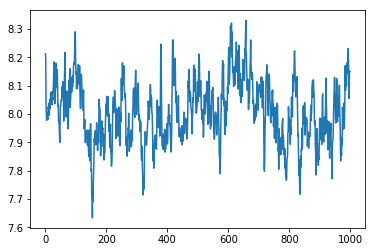

array([ 8.05493685,  8.15212669,  8.15002973])

In [23]:
means=[]
for counter in range(1, 1000):
    mus=r*(h-mu)+mu
    h=numpy.random.normal(loc=mus,scale=1)
    means=numpy.append(arr=means,values=numpy.mean(h))
plt.plot(means);plt.show();means[-3:]